> This notebook presents shows how to solve some tasks with random action, assigned deterministic action, or heuristic action and how to render the process of tasks to video.

# CoLab Preambles

Most of the requirements of python packages are already fulfilled on CoLab. To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.

In [1]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (581 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of 

In [2]:
!pip install gym[atari]

For rendering environment, you can use pyvirtualdisplay. So fulfill that 

In [3]:
!pip install pyvirtualdisplay
!pip install piglet

     |████████████████████████████████| 67 kB 2.6 MB/s 


To activate virtual display we need to run a script once for training an agent, as follows:

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [5]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [6]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [7]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

# OpenAI Gym

OpenAI gym is a python library that wraps many classical decision problems including robot control, videogames and board games. We will use the environments it provides to test our algorithms on interesting decision problems .

This gym [wiki](https://github.com/openai/gym/wiki) explains more about the environment. 

Good general-purpose agents don't need to know the semantics of the observations: they can learn how to map observations to actions to maximize reward without any prior knowledge.

That said, the meaning of Box(4,)
[position of cart, velocity of cart, angle of pole, rotation rate of pole]. Defined at https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py#L75

## Explore environment object

- env.observation_space
- env.action_space 

- env.reset() : reset environment to initial state, return first observation
- env.render(): show current environment state (a more colorful version :) )
- env.step(action) : commit action a and return (new observation, reward, is done, info)

## CartPole

In [8]:
import gym
env = gym.make('CartPole-v0')
env = wrap_env(env) 

print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
#env.render()

print('initial observation:', obs)

action = env.action_space.sample()  # take a random action

obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
action space: Discrete(2)
initial observation: [-0.03375811  0.02056593  0.04070196  0.04100833]
next observation: [-0.03334679  0.21508131  0.04152213 -0.23856001]
reward: 1.0
done: False
info: {}


### Display Video

In [9]:
'''CartPole problem use random action'''
import gym
env = gym.make('CartPole-v0')
env = wrap_env(env)  # defined before for rendering online

observation = env.reset()
    
while True:
  env.render()
  
  # your agent goes here
  action = env.action_space.sample()   # take a random action
  observation, reward, done, info = env.step(action) 
  #print(reward)
   
  if done: 
    break;
            
env.close()
show_video()

## MountainCar

### Random Action

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)
initial observation code: [-0.41606177  0.        ]


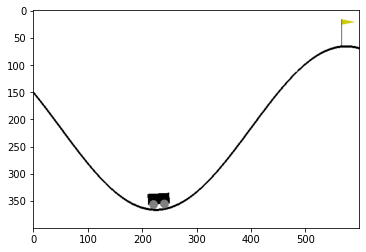

In [10]:
import gym
env = gym.make("MountainCar-v0")
env = wrap_env(env)
env.reset()
#
# explore MountainCar environment
#
plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

#
# take random actions and show the video result
# In MountainCar, observation is just two numbers: 
# car position and velocity
#
observation = env.reset()
print("initial observation code:", observation)

    
while True:
  env.render()
  
  # your agent goes here
  action = env.action_space.sample()   # take a random action
  observation, reward, done, info = env.step(action) 
  # print(reward)
   
  if done: 
    break;
            
env.close()
show_video()

### Assigned Action

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)


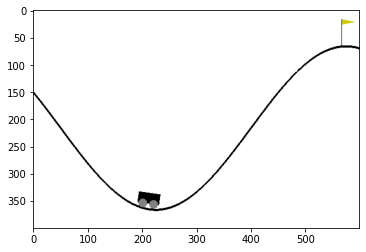

In [11]:
import gym
env = gym.make("MountainCar-v0")
env = wrap_env(env)
env.reset()
# explore MountainCar environment
#
plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

initial observation code: [-0.50305005  0.        ]
taking action 2 (right)
new observation code: [-0.50220407  0.00084598]
reward: -1.0
is game over?: False


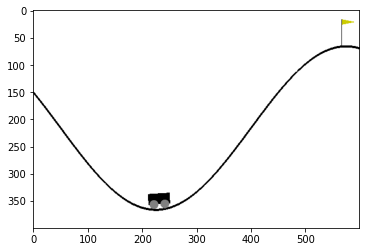

In [12]:
# Explore a little bit
obs = env.reset()
print("initial observation code:", obs)
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# As you can see, the car has moved to the right slightly (around 0.0005)
plt.imshow(env.render('rgb_array'))

### MountainCar Video: Keep moving right by assignment

In [13]:
import gym
env = gym.make("MountainCar-v0")
env = wrap_env(env)

#
# explore MountainCar environment
#
# plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

#
# keep moving right and show the video result
# In MountainCar, observation is just two numbers: 
# car position and velocity
#
observation = env.reset()
print("initial observation code:", observation)

    
#while True:
for _ in range(1000):
  env.render()
  
  # your agent goes here
  print("taking action 2 (right)")
  action = 2   
  observation, reward, done, info = env.step(action) 
  print(reward)
   
  if done: 
    env.reset()
            
env.close()
show_video()



Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)
initial observation code: [-0.54557856  0.        ]
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
ta

### MountainCar with heuristic action strategy

In [14]:
import gym
from gym.envs.classic_control.mountain_car import MountainCarEnv

In [15]:
#
# create env manually to set time limit. Please don't change this.
#
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(MountainCarEnv(), max_episode_steps=TIME_LIMIT + 1)
env = wrap_env(env)

obs = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

#
# prepare "display"
#
#%matplotlib notebook
#fig = plt.figure()
#ax = fig.add_subplot(111)
#fig.show()

#
# simple heuristic policy
#
def policy(t):
    if t>50 and t<100:
        return actions['left']
    else:
        return actions['right']


for t in range(TIME_LIMIT):
    
    #
    # change the line below to reach the flag
    #
    obs, r, done, _ = env.step(policy(t))
    
    # draw game image on display
    #ax.clear()
    #ax.imshow(env.render('rgb_array'))
    #fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
#    else:    
#        print("Time limit exceeded. Try again.")

env.close()
show_video()

Well done!
